# **<center>2EC602 - Machine Learning**
## **<center>SPECIAL ASSIGNMENT**

### <center>*OCR for Devnagri Script Using a Deep Hybrid CNN-RNN Network*

In [ ]:
pip install tensorflow==2.3

     |████████████████████████████████| 320.4MB 51kB/s 
     |████████████████████████████████| 20.1MB 76.2MB/s 
     |████████████████████████████████| 2.9MB 33.0MB/s 
     |████████████████████████████████| 460kB 61.3MB/s 
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
  Found existing installation: tensorflow-estimator 2.5.0
    Uninstalling tensorflow-estimator-2.5.0:
      Successfully uninstalled tensorflow-estimator-2.5.0
  Found existing installation: gast 0.4.0
    Uninstalling gast-0.4.0:
      Successfully uninstalled gast-0.4.0
  Found existing installation: tensorflow

In [ ]:
# Importing the necessary libraries & modules
import os
import cv2
import h5py
import numpy as np
import pickle
import random
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
import itertools
from tensorflow.keras import optimizers
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from IPython.display import Image
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Activation, Dropout, Flatten, Dense, BatchNormalization, LSTM, TimeDistributed, GlobalAveragePooling2D

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import tensorflow as tf # Should be 2.3
print(tf.version.VERSION)

2.3.0


## **1. Creating the Training & Testing Datasets**

---


The following operations would be performed in this section,


*   Visualising the training dataset.
*   Creating the datasets required for training and testing the models which are going to be designed. This would involve assigning the corresponding characters to each of the images in the Train & Test folders.
*   Preprocessing the datasets. This would involve randomising the datasets, reshaping & normalising the pixels of the images and encoding the class values so that it could be later fed into the model easily.
*   Saving the created datasets for future access.







In [ ]:
# Defining the directories, categories
#data_dir = "C:/Users/VINCENT/ML_SEM6/SPECIAL_ASSIGNEMENT"
data_dir = "/content/drive/MyDrive/Colab Notebooks"
#data_dir = "/content/drive/MyDrive/DL OCR Devnagri"
#data_dir = "C:/Users/HP/Downloads/DevanagariHandwrittenCharacterDataset/DevanagariHandwrittenCharacterDataset"
datasets_dir = ["Train", "Test"]
category_map = {"character_1_ka":  [u'\u0915', 'ka'],
                "character_2_kha": [u'\u0916', 'kha'], 
                "character_3_ga": [u'\u0917', 'ga'],
                "character_4_gha":  [u'\u0918', 'gha'],
                "character_5_kna": [u'\u0919', 'nga'],
                "character_6_cha":  [u'\u091A', 'cha'],
                "character_7_chha": [u'\u091B', 'chha'],
                "character_8_ja":  [u'\u091C', 'ja'],
                "character_9_jha": [u'\u091D', 'jha'],
                "character_10_yna":  [u'\u091E', 'nya'],
                "character_11_taamatar": [u'\u091F', 'tta'],
                "character_12_thaa":  [u'\u0920', 'ttha'],
                "character_13_daa": [u'\u0921', 'dda'],
                "character_14_dhaa":  [u'\u0922', 'ddha'],
                "character_15_adna": [u'\u0923', 'adna'],
                "character_16_tabala":  [u'\u0924', 'ta'],
                "character_17_tha": [u'\u0925', 'tha'],
                "character_18_da":  [u'\u0926', 'da'],
                "character_19_dha": [u'\u0927', 'dha'],
                "character_20_na":  [u'\u0928', 'na'],
                "character_21_pa": [u'\u092A', 'pa'],
                "character_22_pha":  [u'\u092B', 'pha'],
                "character_23_ba": [u'\u092C', 'ba'],
                "character_24_bha":  [u'\u092D', 'bha'],
                "character_25_ma": [u'\u092E', 'ma'],
                "character_26_yaw":  [u'\u092F', 'yaw'],
                "character_27_ra": [u'\u0930', 'ra'],
                "character_28_la":  [u'\u0932', 'la'],
                "character_29_waw": [u'\u0935', 'waw'],
                "character_30_motosaw":  [u'\u0936', 'sha'],
                "character_31_petchiryakha": [u'\u0937', 'ksha'],
                "character_32_patalosaw":  [u'\u0938', 'sa'],
                "character_33_ha": [u'\u0939', 'ha'],
                "character_34_chhya":  ['क्ष', 'ksha'],
                "character_35_tra": ['त्र', 'tra'],
                "character_36_gya": ['ज्ञ', 'gya'],
                "digit_0":  [u'\u0966', '0'],
                "digit_1": [u'\u0967', '1'],
                "digit_2":  [u'\u0968', '2'],
                "digit_3": [u'\u0969', '3'],
                "digit_4":  [u'\u096A', '4'],
                "digit_5": [u'\u096B', '5'],
                "digit_6":  [u'\u096C', '6'],
                "digit_7": [u'\u096D', '7'],
                "digit_8":  [u'\u096E', '8'],
                "digit_9": [u'\u096F', '9'],
                } # Maps the folder name to the corresponding unicode character 
                                                    

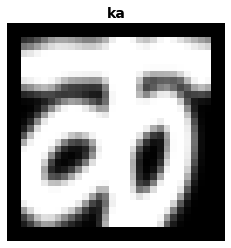

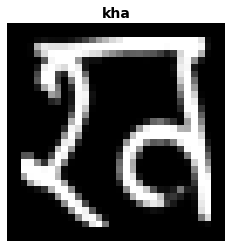

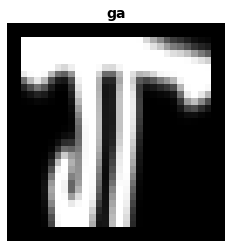

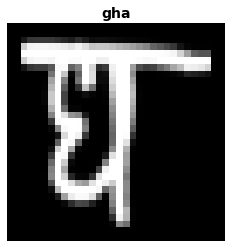

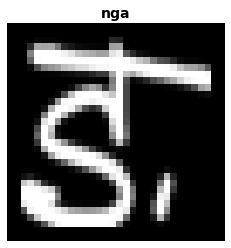

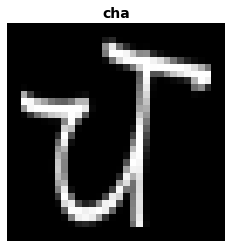

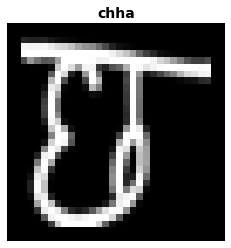

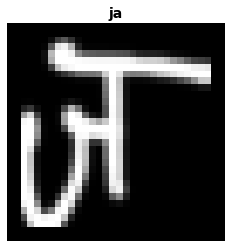

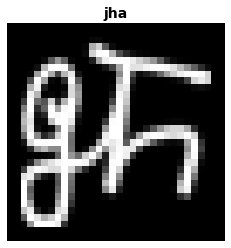

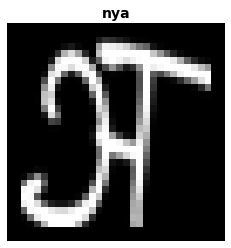

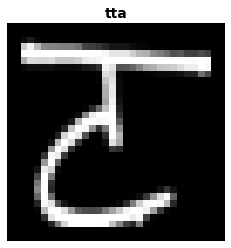

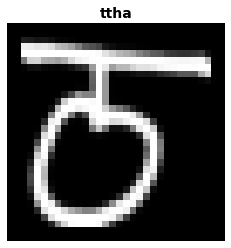

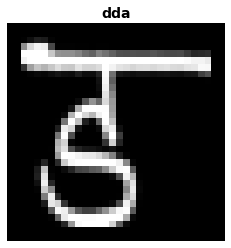

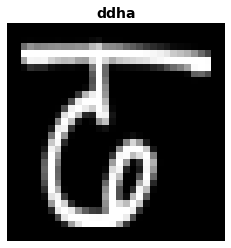

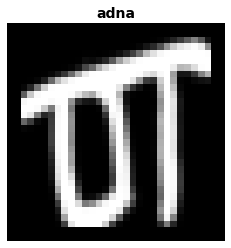

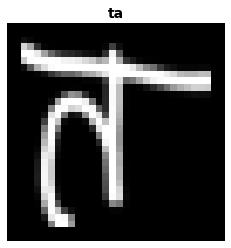

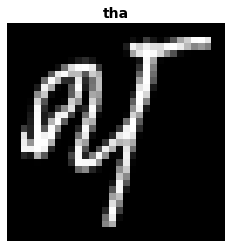

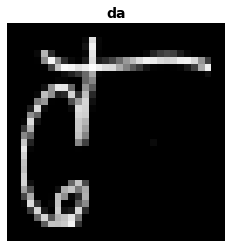

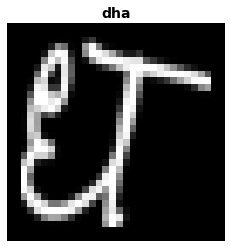

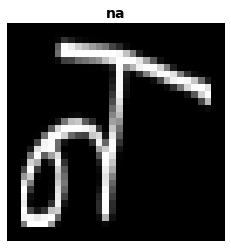

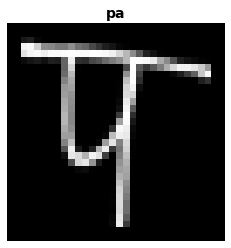

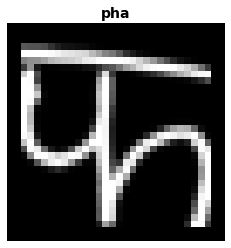

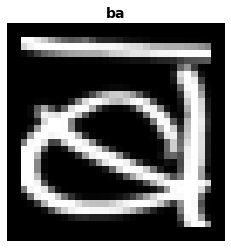

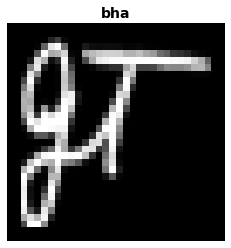

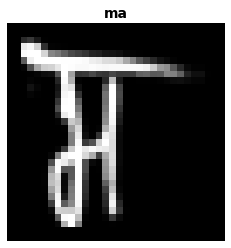

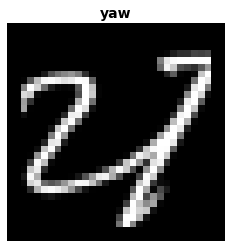

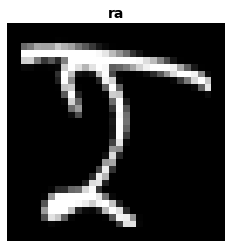

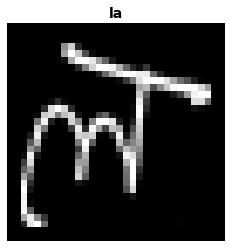

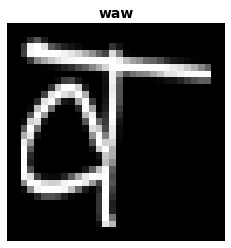

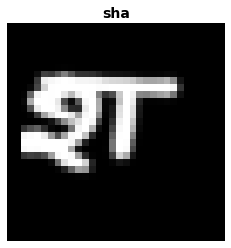

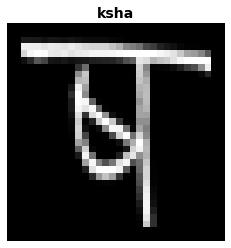

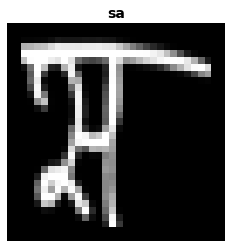

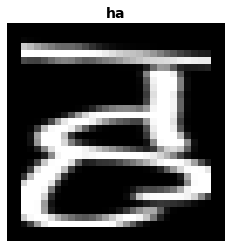

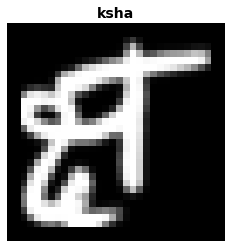

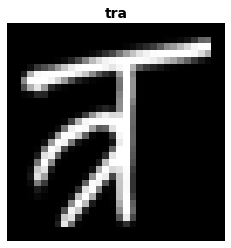

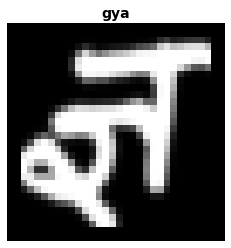

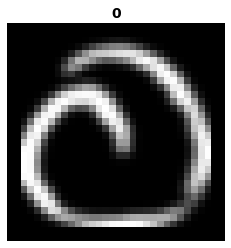

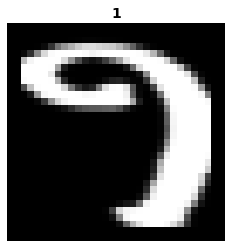

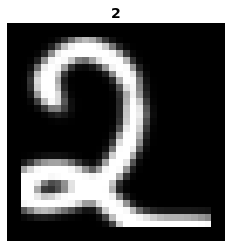

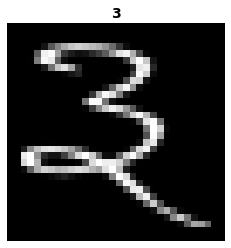

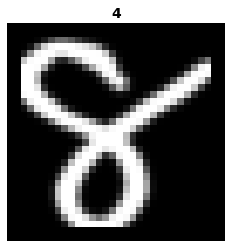

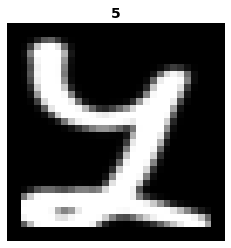

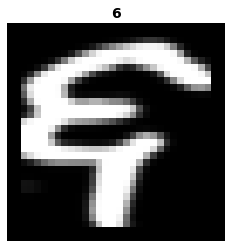

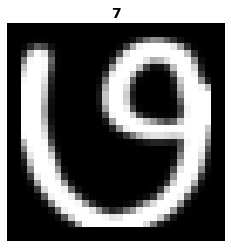

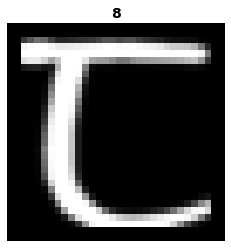

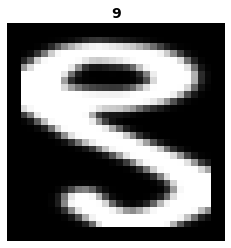

In [ ]:
# First visualising the training set
for category in category_map.keys():
    path = os.path.join(data_dir, datasets_dir[0], category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap = "gray")
        plt.axis("off")
        plt.title(category_map[category][1], fontsize = 14, fontweight = 'bold')
        plt.show()
        break

In [ ]:
img_array.shape

(32, 32)

In [ ]:
def create_train():
    """
    Creates the training dataset
    """
    train = []
    for category in category_map.keys():
        cat_count = 0
        path = os.path.join(data_dir, datasets_dir[0], category)
        for img in os.listdir(path):
            cat_count += 1
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                class_char = category_map[category][0]
                train.append([img_array, class_char])
            except Exception as e:
                pass # If a broken image is encountered
        print("Class %s - No. of Samples: %d" %(category_map[category][0], cat_count)) # No. of samples in each category would be observed
    return train

def create_test():
    """
    Creates the test dataset
    """
    test = []
    for category in category_map.keys():
        cat_count = 0
        path = os.path.join(data_dir, datasets_dir[1], category)
        for img in os.listdir(path):
            cat_count += 1
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                class_char = category_map[category][0]
                test.append([img_array, class_char])
            except Exception as e:
                pass # If a broken image is encountered
        print("Class %s - No. of Samples: %d" %(category_map[category][0], cat_count)) # No. of samples in each category would be observed
    return test
        
def prep_set(train, test):
    """
    Prepares the provided train & test datasets for further operations
    """
    random.shuffle(train)
    random.shuffle(test)
    trainx = []
    trainy = []
    testx = []
    testy = []
    
    for features, label in train:
        trainx.append(features)
        trainy.append(label)
        
    for features, label in test:
        testx.append(features)
        testy.append(label)
        
    trainx = np.array(trainx).reshape(-1, 32, 32, 1)
    trainx = trainx.astype('float32')
    trainx = trainx / 255.0
    
    testx = np.array(testx).reshape(-1, 32, 32, 1)
    testx = testx.astype('float32')
    testx = testx / 255.0
    
    enc = LabelEncoder()
    enc.fit(trainy)
    trainy = enc.transform(trainy) # Integer encoding the characters
    testy = enc.transform(testy)
    return trainx, trainy, testx, testy, enc 

In [ ]:
train = create_train()

Class क - No. of Samples: 1700
Class ख - No. of Samples: 1700
Class ग - No. of Samples: 1700
Class घ - No. of Samples: 1700
Class ङ - No. of Samples: 1700
Class च - No. of Samples: 1700
Class छ - No. of Samples: 1700
Class ज - No. of Samples: 1700
Class झ - No. of Samples: 1700
Class ञ - No. of Samples: 1700
Class ट - No. of Samples: 1700
Class ठ - No. of Samples: 1700
Class ड - No. of Samples: 1700
Class ढ - No. of Samples: 1700
Class ण - No. of Samples: 1700
Class त - No. of Samples: 1700
Class थ - No. of Samples: 1700
Class द - No. of Samples: 1700
Class ध - No. of Samples: 1700
Class न - No. of Samples: 1700
Class प - No. of Samples: 1700
Class फ - No. of Samples: 1700
Class ब - No. of Samples: 1700
Class भ - No. of Samples: 1700
Class म - No. of Samples: 1700
Class य - No. of Samples: 1700
Class र - No. of Samples: 1700
Class ल - No. of Samples: 1700
Class व - No. of Samples: 1700
Class श - No. of Samples: 1700
Class ष - No. of Samples: 1700
Class स - No. of Samples: 1700
Class ह 

In [ ]:
print("Size of the Training Set: ", len(train))

Size of the Training Set:  78200


In [ ]:
test = create_test()
print("\nSize of the Test Set: ", len(test))

Class क - No. of Samples: 300
Class ख - No. of Samples: 300
Class ग - No. of Samples: 300
Class घ - No. of Samples: 300
Class ङ - No. of Samples: 300
Class च - No. of Samples: 300
Class छ - No. of Samples: 300
Class ज - No. of Samples: 300
Class झ - No. of Samples: 300
Class ञ - No. of Samples: 300
Class ट - No. of Samples: 300
Class ठ - No. of Samples: 300
Class ड - No. of Samples: 300
Class ढ - No. of Samples: 300
Class ण - No. of Samples: 300
Class त - No. of Samples: 300
Class थ - No. of Samples: 300
Class द - No. of Samples: 300
Class ध - No. of Samples: 300
Class न - No. of Samples: 300
Class प - No. of Samples: 300
Class फ - No. of Samples: 300
Class ब - No. of Samples: 300
Class भ - No. of Samples: 300
Class म - No. of Samples: 300
Class य - No. of Samples: 300
Class र - No. of Samples: 300
Class ल - No. of Samples: 300
Class व - No. of Samples: 300
Class श - No. of Samples: 300
Class ष - No. of Samples: 300
Class स - No. of Samples: 300
Class ह - No. of Samples: 300
Class क्ष 

In [ ]:
trainx, trainy, testx, testy, enc = prep_set(train, test)

In [ ]:
# Saving both the datasets

pickle_out = open("train.pickle","wb")
pickle.dump(train, pickle_out)
pickle_out.close()

pickle_out = open("test.pickle","wb")
pickle.dump(test, pickle_out)
pickle_out.close()

pickle_out = open("trainx.pickle","wb")
pickle.dump(trainx, pickle_out)
pickle_out.close()

pickle_out = open("trainy.pickle","wb")
pickle.dump(trainy, pickle_out)
pickle_out.close()

pickle_out = open("testx.pickle","wb")
pickle.dump(testx, pickle_out)
pickle_out.close()

pickle_out = open("testy.pickle","wb")
pickle.dump(testy, pickle_out)
pickle_out.close()

pickle_out = open("enc.pickle","wb")
pickle.dump(enc, pickle_out)
pickle_out.close()

# **2. Defining the Models**

---


The following operations would be performed in this section,


*   Defining the CNN model layer by layer, later compiling & visualising the model.
*   Defining the hybrid CNN-RNN or CRNN model, compiling & visualising it.
*   Definining the models of other standard CNN architectures.




In [ ]:
# Loading the saved datasets
pickle_in = open("/content/drive/MyDrive/Colab Notebooks/train.pickle","rb")
train = pickle.load(pickle_in)

pickle_in = open("/content/drive/MyDrive/Colab Notebooks/test.pickle","rb")
test = pickle.load(pickle_in)

pickle_in = open("/content/drive/MyDrive/Colab Notebooks/trainx.pickle","rb")
trainx = pickle.load(pickle_in)

pickle_in = open("/content/drive/MyDrive/Colab Notebooks/trainy.pickle","rb")
trainy = pickle.load(pickle_in)

pickle_in = open("/content/drive/MyDrive/Colab Notebooks/testx.pickle","rb")
testx = pickle.load(pickle_in)

pickle_in = open("/content/drive/MyDrive/Colab Notebooks/testy.pickle","rb")
testy = pickle.load(pickle_in)

pickle_in = open("/content/drive/MyDrive/Colab Notebooks/enc.pickle","rb")
enc = pickle.load(pickle_in)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator LabelEncoder from version 0.22.1 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [ ]:
trainx_rgb = np.ndarray(shape = (trainx.shape[0], trainx.shape[1], trainx.shape[2], 3), dtype= 'float32')
trainx_rgb[:, :, :, 0] = trainx[:, :, :, 0]
trainx_rgb[:, :, :, 1] = trainx[:, :, :, 0]
trainx_rgb[:, :, :, 2] = trainx[:, :, :, 0]

testx_rgb = np.ndarray(shape = (testx.shape[0], trainx.shape[1], trainx.shape[2], 3), dtype= 'float32')
testx_rgb[:, :, :, 0] = testx[:, :, :, 0]
testx_rgb[:, :, :, 1] = testx[:, :, :, 0]
testx_rgb[:, :, :, 2] = testx[:, :, :, 0]

In [ ]:
print(trainx.shape)
print(testx.shape)
img_shape = trainx[0].shape # (32, 32, 1) Input image to the model
print(trainx_rgb.shape)
print(testx_rgb.shape)
img_shape_rgb = trainx_rgb[0].shape # (32, 32, 3) Input image to the the architectures

(78200, 32, 32, 1)
(13800, 32, 32, 1)
(78200, 32, 32, 3)
(13800, 32, 32, 3)


**Defining the CNN Model**

In [ ]:
# First building the CNN model
model1 = Sequential()

#-------------------------------------------------Layer 1-------------------------------------------------------------#
model1.add(Convolution2D(filters = 32, kernel_size = (5,5), strides = 1, activation = "relu", input_shape = img_shape))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = "same"))

#-------------------------------------------------Layer 2-------------------------------------------------------------#
model1.add(Convolution2D(filters = 32, kernel_size = (5,5), strides = 1, activation = "relu"))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = "same"))

#-------------------------------------------------Layer 3-------------------------------------------------------------#
model1.add(Convolution2D(filters = 64, kernel_size = (5,5), strides= 1, activation = "relu"))
model1.add(BatchNormalization())

#-------------------------------------------------Layer 4-------------------------------------------------------------#
model1.add(Flatten())

model1.add(Dense(64, activation = "relu", kernel_initializer = "uniform"))
model1.add(Dropout(0.5))
model1.add(BatchNormalization())

model1.add(Dense(46, activation = "softmax", kernel_initializer = "uniform")) # Final Output Layer

# Now compiling the model
model1.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"]) # Validation loss as the stopping parameter

In [ ]:
print(model1.summary())

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 28, 28, 32)        832       
_________________________________________________________________
batch_normalization_30 (Batc (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 10, 10, 32)        25632     
_________________________________________________________________
batch_normalization_31 (Batc (None, 10, 10, 32)        128       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 1, 1, 64)         

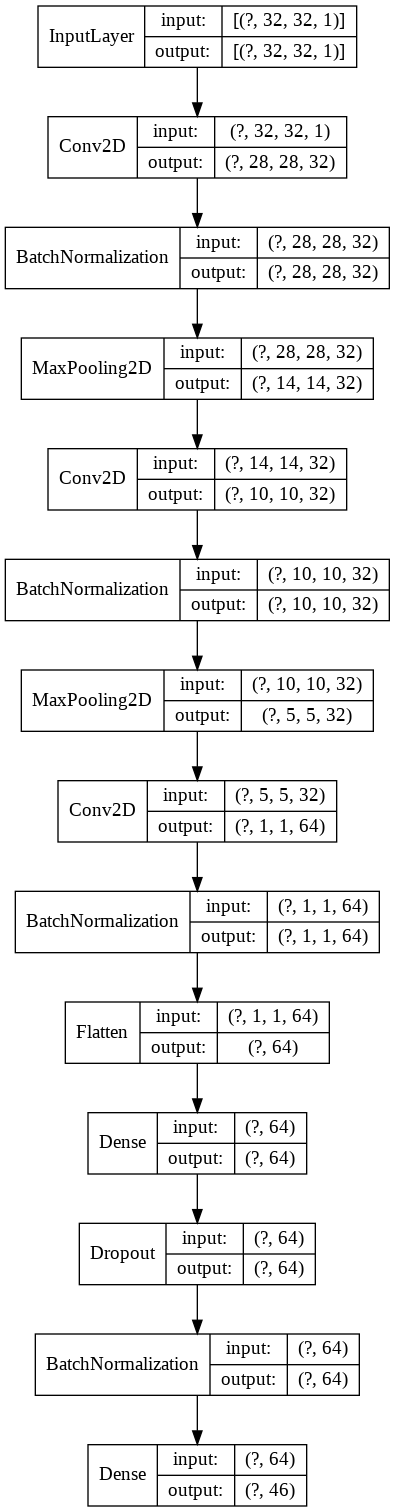

In [ ]:
plot_model(model1, to_file = 'model1.png', show_shapes = True, show_layer_names = False)
Image('model1.png')

**Defining the Hybrid CNN-RNN Model**

In [ ]:
model2 = Sequential()

#-------------------------------------------------Layer 1-------------------------------------------------------------#
model2.add(Convolution2D(filters = 64, kernel_size = (5,5), strides = 1, activation = "relu", input_shape = img_shape))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = "same"))

#-------------------------------------------------Layer 2-------------------------------------------------------------#
model2.add(Convolution2D(filters = 64, kernel_size = (5,5), strides = 1, activation = "relu"))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = "same"))

#-------------------------------------------------Layer 3-------------------------------------------------------------#
model2.add(Convolution2D(filters = 64, kernel_size = (5,5), strides = 1, activation = "relu"))
model2.add(BatchNormalization())

#-------------------------------------------------Layer 4-------------------------------------------------------------#
model2.add(TimeDistributed(Flatten()))
next_input_shape = (model2.output_shape[1], model2.output_shape[2]) # Retrieving the output shape for the LSTM layer

model2.add(LSTM(64, input_shape = next_input_shape, return_sequences = True))

model2.add(LSTM(64, return_sequences = True))

#-------------------------------------------------Layer 5-------------------------------------------------------------#
model2.add(Flatten())

model2.add(Dense(64, activation = "softmax", kernel_initializer = "uniform")) # Replacing ReLu with softmax -> better accuracy, slower training time
model2.add(Dropout(0.5))

model2.add(Dense(46, activation = "softmax", kernel_initializer = "uniform")) # Final Output Layer

# Now compiling the model
model2.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [ ]:
print(model2.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 28, 28, 64)        1664      
_________________________________________________________________
batch_normalization_9 (Batch (None, 28, 28, 64)        256       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 10, 10, 64)        102464    
_________________________________________________________________
batch_normalization_10 (Batc (None, 10, 10, 64)        256       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 1, 1, 64)         

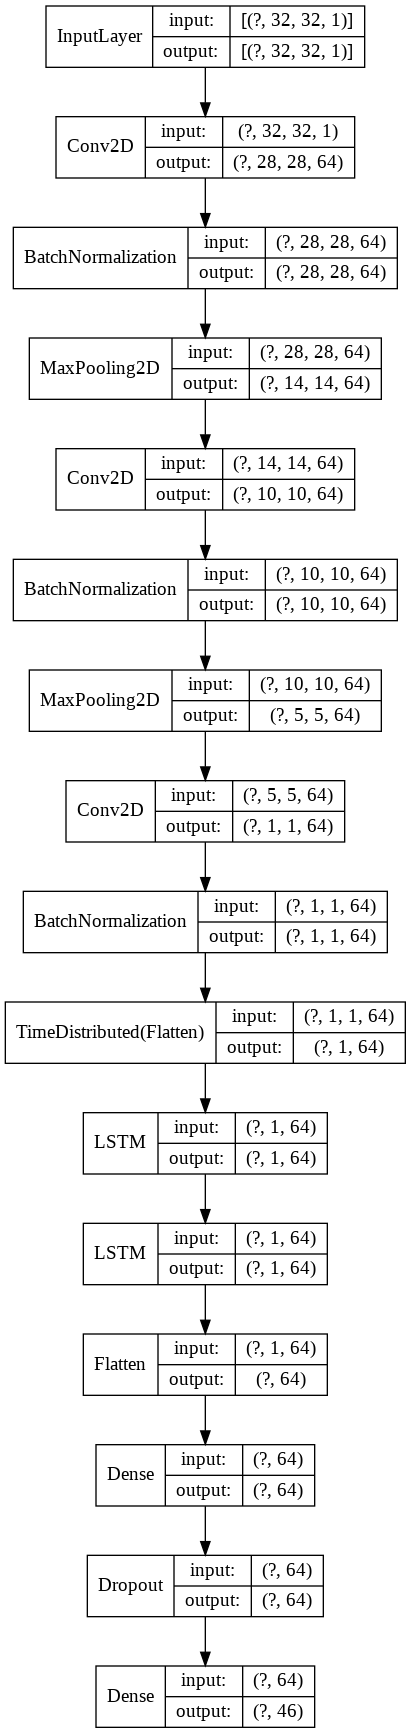

In [ ]:
plot_model(model2, to_file = 'model2.png', show_shapes = True, show_layer_names = False)
Image('model2.png')

**Creating the classes for other CNN architectures**

The following CNN architectures would be created,
*   VGG16
*   AlexNet



The performance of these architectures would later be compared to both the previously defined models.



In [ ]:
# All the architectures work on RGB channels
conv_base = tf.keras.applications.vgg16.VGG16(input_shape = img_shape_rgb, weights=None, include_top=False)
vgg_model = conv_base.output
vgg_model = Flatten()(vgg_model)
vgg_model = Dropout(0.5)(vgg_model)
vgg_model = Dense(46, activation = "softmax")(vgg_model)
vgg_model = Model(conv_base.input, vgg_model)
vgg_model.compile(optimizer = 'sgd', loss = "categorical_crossentropy", metrics = ["accuracy"])
vgg_model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)        

In [ ]:
np.random.seed(1000)
#Instantiation
AlexNet = Sequential()

#1st Convolutional Layer
AlexNet.add(Convolution2D(filters=96, input_shape=img_shape_rgb, kernel_size=(11,11), strides=(4,4), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#2nd Convolutional Layer
AlexNet.add(Convolution2D(filters=256, kernel_size=(5, 5), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#3rd Convolutional Layer
AlexNet.add(Convolution2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

#4th Convolutional Layer
AlexNet.add(Convolution2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

#5th Convolutional Layer
AlexNet.add(Convolution2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#Passing it to a Fully Connected layer
AlexNet.add(Flatten())
# 1st Fully Connected Layer
AlexNet.add(Dense(4096, input_shape=(32,32,3,)))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
# Add Dropout to prevent overfitting
AlexNet.add(Dropout(0.4))

#2nd Fully Connected Layer
AlexNet.add(Dense(4096))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
#Add Dropout
AlexNet.add(Dropout(0.4))

#3rd Fully Connected Layer
AlexNet.add(Dense(1000))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
#Add Dropout
AlexNet.add(Dropout(0.4))

#Output Layer
AlexNet.add(Dense(46))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('softmax'))
AlexNet.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])
#Model Summary
AlexNet.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 8, 8, 96)          34944     
_________________________________________________________________
batch_normalization_9 (Batch (None, 8, 8, 96)          384       
_________________________________________________________________
activation_9 (Activation)    (None, 8, 8, 96)          0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 96)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 4, 4, 256)         614656    
_________________________________________________________________
batch_normalization_10 (Batc (None, 4, 4, 256)         1024      
_________________________________________________________________
activation_10 (Activation)   (None, 4, 4, 256)        

# **3. Training & Evaluating the Models**
----
The following operations would be performed in this section,


*   Training & evauation of the CNN and CRNN model with early stopping.
*   Plotting the loss vs epochs graphs for both the models.
*   Creating confusion matrix for each model.
*   Training and evaluating the VGG, ResNet & EfficientNet models.

**Training & Evaluating the CNN Model**

In [ ]:
def train_evaluate(model):
  '''
  Trains the model by monitoring its performance. 
  Evaluates the model based on its performance on the test & train set
  '''
  reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001, verbose = 1)
  es = EarlyStopping(monitor='val_loss', mode='min', verbose = 1, patience = 7) # Creating an EarlyStopping object in order to monitor the performance of the model
  history = model.fit(trainx, trainy, validation_split = 0.3, epochs = 100, verbose = 1, callbacks=[reduce_lr, es]) # Using 30% of the training data for validation
  _, train_acc = model.evaluate(trainx, trainy, verbose = 0)
  _, test_acc = model.evaluate(testx, testy, verbose = 0)
  print("\nTraining Accuracy: %.3f %%, Testing Accuracy: %.3f %%" % (train_acc * 100, test_acc * 100))
  return model, history

def train_evaluate_rgb(model):
  '''
  Trains the model by monitoring its performance. 
  Evaluates the model based on its performance on the test & train set.
  '''
  reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-4, verbose = 1)
  es = EarlyStopping(monitor='val_loss', mode='min', verbose = 1, patience = 7) # Creating an EarlyStopping object in order to monitor the performance of the model
  history = model.fit(trainx_rgb, trainy, validation_split = 0.3, epochs = 70, verbose = 1, callbacks=[reduce_lr, es]) # Using 30% of the training data for validation
  _, train_acc = model.evaluate(trainx_rgb, trainy, verbose=0)
  _, test_acc = model.evaluate(testx_rgb, testy, verbose = 0)
  print("\nTraining Accuracy: %.3f %%, Testing Accuracy: %.3f %%" % (train_acc * 100, test_acc * 100))
  return model, history

In [ ]:
model1, history_model1 = train_evaluate(model1)

Epoch 1/100
1711/1711 [==============================] - 8s 5ms/step - loss: 1.2279 - accuracy: 0.7066 - val_loss: 0.2979 - val_accuracy: 0.9202 - lr: 0.0010
Epoch 2/100
1711/1711 [==============================] - 8s 5ms/step - loss: 0.4336 - accuracy: 0.8801 - val_loss: 0.1726 - val_accuracy: 0.9490 - lr: 0.0010
Epoch 3/100
1711/1711 [==============================] - 8s 5ms/step - loss: 0.3212 - accuracy: 0.9108 - val_loss: 0.1340 - val_accuracy: 0.9604 - lr: 0.0010
Epoch 4/100
1711/1711 [==============================] - 8s 5ms/step - loss: 0.2919 - accuracy: 0.9184 - val_loss: 0.1038 - val_accuracy: 0.9685 - lr: 0.0010
Epoch 5/100
1711/1711 [==============================] - 8s 5ms/step - loss: 0.2452 - accuracy: 0.9302 - val_loss: 0.0974 - val_accuracy: 0.9698 - lr: 0.0010
Epoch 6/100
1711/1711 [==============================] - 8s 5ms/step - loss: 0.2167 - accuracy: 0.9382 - val_loss: 0.1036 - val_accuracy: 0.9692 - lr: 0.0010
Epoch 7/100
1711/1711 [=============================

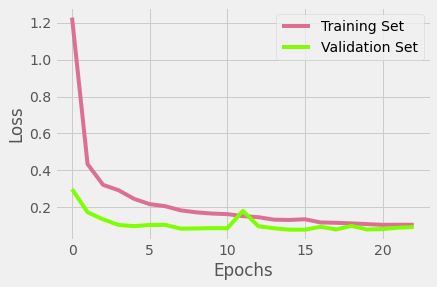

In [ ]:
# Plotting a graph from the training & evaluation results
plt.style.use('fivethirtyeight')
plt.plot(history_model1.history['loss'], label = "Training Set", color = 'palevioletred')
plt.plot(history_model1.history['val_loss'], label = "Validation Set", color = 'chartreuse')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('/content/drive/MyDrive/Colab Notebooks/CNN_plot.png', bbox_inches = 'tight', dpi = 300)
plt.show()

In [ ]:
# Saving the trained model
model1.save("/content/drive/MyDrive/Colab Notebooks/model1.h5")

In [ ]:
# Loading the trained model
import tensorflow
model1 = tensorflow.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/model1.h5')

In [ ]:
testy_label = np.argmax(testy, axis = 1) # Converting to Label Encoded form
print(testy_label[:10])

[45 43 25 38  8  8  5 17 40  4]


In [ ]:
y_predicted1 = model1.predict(testx)
y_predicted_labels1 = np.argmax(y_predicted1, axis=1) # Converting the one-hot encoded values to label encoded form
y_predicted_labels1[:10]

array([45, 43, 25, 38,  8,  8,  5, 17, 40,  4])

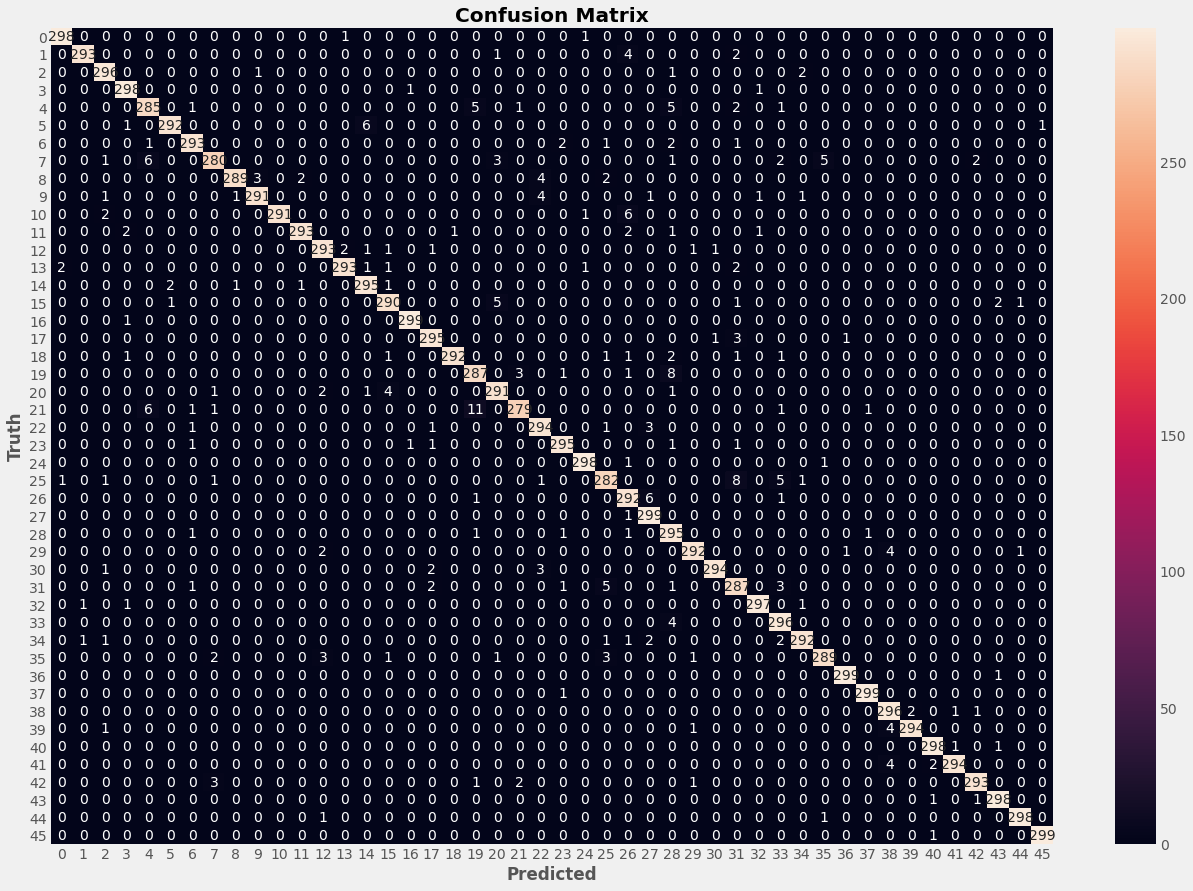

In [ ]:
# Creating a confusion matrix for the model
cm = tf.math.confusion_matrix(labels = testy_label, predictions = y_predicted_labels1)
plt.figure(figsize= (20,14))
sns.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted', fontweight = 'bold')
plt.ylabel('Truth', fontweight = 'bold')
plt.title('Confusion Matrix', fontweight = 'bold')
plt.show()

In [ ]:
import sklearn as sk
from sklearn.metrics import confusion_matrix

confusion_matrix(testy_label, y_predicted_labels1)
print ("Precision", sk.metrics.precision_score(testy_label, y_predicted_labels1, average='macro'))
print ("Recall", sk.metrics.recall_score(testy_label, y_predicted_labels1, average='macro'))
print ("f1_score", sk.metrics.f1_score(testy_label, y_predicted_labels1, average='macro'))

Precision 0.9773069570979042
Recall 0.9770289855072463
f1_score 0.9770575073418272


**Training & Evaluating the Hybrid CNN-RNN Model**

In [ ]:
model2, history_model2 = train_evaluate(model2) 

Epoch 1/100
1711/1711 [==============================] - 12s 7ms/step - loss: 3.5281 - accuracy: 0.0606 - val_loss: 3.2454 - val_accuracy: 0.1249 - lr: 0.0010
Epoch 2/100
1711/1711 [==============================] - 11s 7ms/step - loss: 3.2209 - accuracy: 0.0818 - val_loss: 2.8665 - val_accuracy: 0.1762 - lr: 0.0010
Epoch 3/100
1711/1711 [==============================] - 11s 7ms/step - loss: 3.0089 - accuracy: 0.1174 - val_loss: 2.5577 - val_accuracy: 0.2906 - lr: 0.0010
Epoch 4/100
1711/1711 [==============================] - 11s 7ms/step - loss: 2.8470 - accuracy: 0.1368 - val_loss: 2.3592 - val_accuracy: 0.3702 - lr: 0.0010
Epoch 5/100
1711/1711 [==============================] - 12s 7ms/step - loss: 2.7039 - accuracy: 0.1850 - val_loss: 2.1015 - val_accuracy: 0.4788 - lr: 0.0010
Epoch 6/100
1711/1711 [==============================] - 12s 7ms/step - loss: 2.5013 - accuracy: 0.2359 - val_loss: 1.8800 - val_accuracy: 0.5720 - lr: 0.0010
Epoch 7/100
1711/1711 [=======================

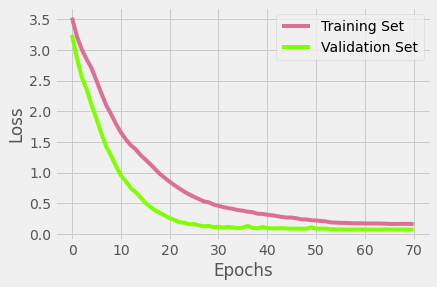

In [ ]:
# Plotting a graph from the training & evaluation results
plt.style.use('fivethirtyeight')
plt.plot(history_model2.history['loss'], label = "Training Set", color = 'palevioletred')
plt.plot(history_model2.history['val_loss'], label = "Validation Set", color = 'chartreuse')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
#plt.title('Loss vs. Epochs for the CRNN Model', fontweight = 'bold', y = 1.08)
plt.savefig('/content/drive/MyDrive/Colab Notebooks/CRNN_plot.png', bbox_inches = 'tight', dpi = 300)
plt.show()

In [ ]:
# Saving the trained model
model2.save("/content/drive/MyDrive/Colab Notebooks/model2.h5")

In [ ]:
# Loading the saved model
model2 = load_model("/content/drive/MyDrive/Colab Notebooks/model2.h5")

In [ ]:
y_predicted2 = model2.predict(testx)
y_predicted_labels2 = np.argmax(y_predicted2, axis = 1)

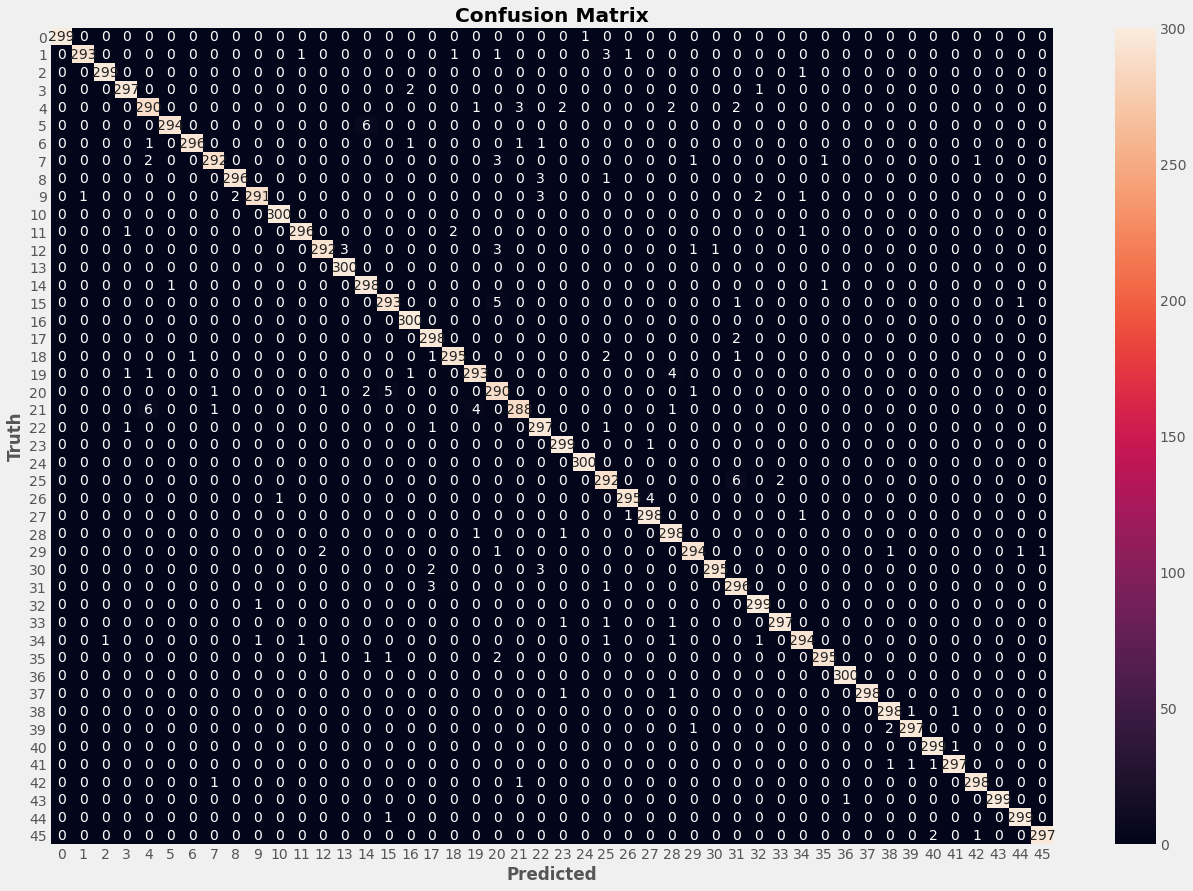

In [ ]:
# Creating a confusion matrix for the model
cm = tf.math.confusion_matrix(labels = testy_label, predictions = y_predicted_labels2)
plt.figure(figsize= (20,14))
sns.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted', fontweight = 'bold')
plt.ylabel('Truth', fontweight = 'bold')
plt.title('Confusion Matrix', fontweight = 'bold')
plt.show()

In [ ]:
import sklearn as sk
from sklearn.metrics import confusion_matrix
confusion_matrix(testy_label, y_predicted_labels2)

print ("Precision", sk.metrics.precision_score(testy_label, y_predicted_labels2, average='macro'))
print ("Recall", sk.metrics.recall_score(testy_label, y_predicted_labels2, average='macro'))
print ("f1_score", sk.metrics.f1_score(testy_label, y_predicted_labels2, average='macro'))
   

Precision 0.9871167178883916
Recall 0.9870289855072466
f1_score 0.9870357695184151


In [ ]:
vgg_model, history_vgg = train_evaluate_rgb(vgg_model)

Epoch 1/70
1711/1711 [==============================] - 52s 31ms/step - loss: 3.8286 - accuracy: 0.0223 - val_loss: 3.8284 - val_accuracy: 0.0198
Epoch 2/70
1711/1711 [==============================] - 54s 31ms/step - loss: 3.8277 - accuracy: 0.0252 - val_loss: 3.8267 - val_accuracy: 0.0281
Epoch 3/70
1711/1711 [==============================] - 53s 31ms/step - loss: 3.4957 - accuracy: 0.1050 - val_loss: 1.6849 - val_accuracy: 0.5297
Epoch 4/70
1711/1711 [==============================] - 53s 31ms/step - loss: 1.0199 - accuracy: 0.6994 - val_loss: 0.5838 - val_accuracy: 0.8231
Epoch 5/70
1711/1711 [==============================] - 53s 31ms/step - loss: 0.4436 - accuracy: 0.8667 - val_loss: 0.2948 - val_accuracy: 0.9100
Epoch 6/70
1711/1711 [==============================] - 53s 31ms/step - loss: 0.2615 - accuracy: 0.9222 - val_loss: 0.2335 - val_accuracy: 0.9301
Epoch 7/70
1711/1711 [==============================] - 53s 31ms/step - loss: 0.1767 - accuracy: 0.9465 - val_loss: 0.1827 -

In [ ]:
AlexNet, history_alex = train_evaluate_rgb(AlexNet)

Epoch 1/70
1711/1711 [==============================] - 26s 15ms/step - loss: 1.2868 - accuracy: 0.6742 - val_loss: 2.1750 - val_accuracy: 0.4564
Epoch 2/70
1711/1711 [==============================] - 25s 15ms/step - loss: 0.5984 - accuracy: 0.8527 - val_loss: 0.9937 - val_accuracy: 0.7258
Epoch 3/70
1711/1711 [==============================] - 26s 15ms/step - loss: 0.4028 - accuracy: 0.9007 - val_loss: 1.0641 - val_accuracy: 0.7095
Epoch 4/70
1711/1711 [==============================] - 26s 15ms/step - loss: 0.2991 - accuracy: 0.9277 - val_loss: 0.3852 - val_accuracy: 0.9084
Epoch 5/70
1711/1711 [==============================] - 25s 15ms/step - loss: 0.2361 - accuracy: 0.9414 - val_loss: 0.7191 - val_accuracy: 0.8153
Epoch 6/70
1711/1711 [==============================] - 26s 15ms/step - loss: 0.1909 - accuracy: 0.9531 - val_loss: 0.7199 - val_accuracy: 0.8228
Epoch 7/70
1711/1711 [==============================] - 26s 15ms/step - loss: 0.1561 - accuracy: 0.9616 - val_loss: 0.5095 -

# **4. Testing the Trained Models Against Custom Input Images**
----
The following operations would be performed in this section,


*   Observe the performance of both the models on custom input images.

**Testing the CNN Model**

In [ ]:
def test_image_model1(img):
  plt.style.use('ggplot')
  path = "/content/drive/MyDrive/Colab Notebooks"
  img_test = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
  img_test = cv2.resize(img_test, (32, 32))
  plt.imshow(img_test, cmap = "gray")
  plt.axis('off')
  plt.title('Visualising the Input image', y = 1.08)
  img_test = img_test.reshape(-1, 32, 32, 1)
  img_test = img_test.astype('float32')
  img_test = img_test / 255.0
  print('The Predicted Label is: ', enc.inverse_transform([np.argmax(model1.predict(img_test))])[0])

The Predicted Label is:  म


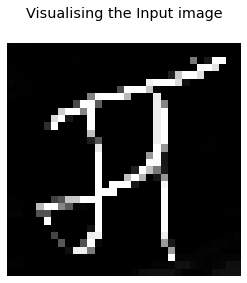

In [ ]:
test_image_model1('ma.png')

The Predicted Label is:  क


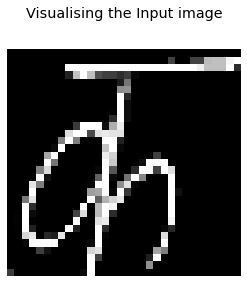

In [ ]:
test_image_model1('ka.png')

The Predicted Label is:  म


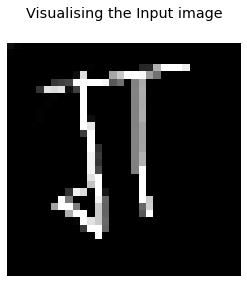

In [ ]:
test_image_model1('ga.png')

The Predicted Label is:  घ


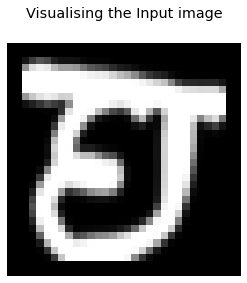

In [ ]:
test_image_model1('gha.png')

**Testing the CRNN Model**

In [ ]:
def test_image_model2(img):
  path = "/content/drive/MyDrive/Colab Notebooks"
  img_test = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
  img_test = cv2.resize(img_test, (32, 32))
  plt.imshow(img_test, cmap = "gray")
  plt.axis('off')
  plt.title('Visualising the Input image', y = 1.08)
  img_test = img_test.reshape(-1, 32, 32, 1)
  img_test = img_test.astype('float32')
  img_test = img_test / 255.0
  print('The Predicted Label is: ', enc.inverse_transform([np.argmax(model2.predict(img_test))])[0])

The Predicted Label is:  म


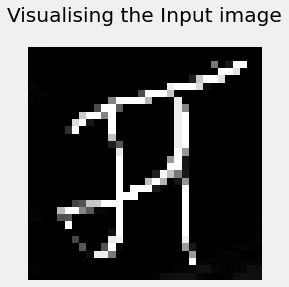

In [ ]:
test_image_model2('ma.png')

The Predicted Label is:  क


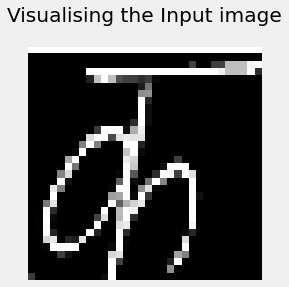

In [ ]:
test_image_model2('ka.png')

The Predicted Label is:  म


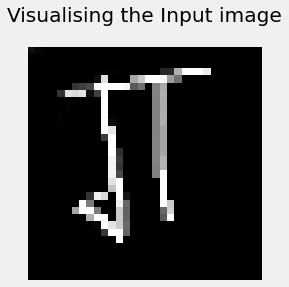

In [ ]:
test_image_model2('ga.png')

The Predicted Label is:  घ


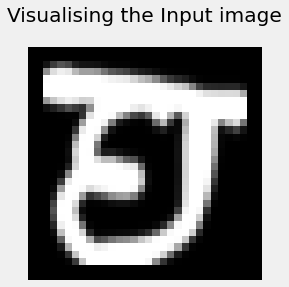

In [ ]:
test_image_model2('gha.png')